#### Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the data

In [2]:
df = pd.read_csv("tech_team_train.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  int64  
 1   StockCode    200000 non-null  int64  
 2   Description  200000 non-null  int64  
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   200000 non-null  float64
 7   Country      200000 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 12.2+ MB


<h3> DATA CLEANING </h3

In [5]:
# Checking for missing values 
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Most of the columns are already cleaned, so let's tackle the InvoiceDate column now

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

InvoiceNo               int64
StockCode               int64
Description             int64
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                 int64
dtype: object

In [15]:
# Adding a few more columns to our dataset 

df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df['Minute'] = df['InvoiceDate'].dt.minute

In [23]:
df['WeekDay'] = df['InvoiceDate'].dt.day
df.drop('WeekDay', axis = 1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Minute
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,16,54
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,7,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,13,20
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,12,7
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,19930,170,1953,-1,2011-05-12 10:29:00,1.65,14606.0,35,2011,5,10,29
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,2011,7,14,21
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,2011,11,10,49
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,2011,3,13,3


In [108]:
df.insert(loc=10, column='Day', value=(df.InvoiceDate.dt.dayofweek)+1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,5,16,54,6,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,3,7,35,11,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,7,13,20,20,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,2,12,7,22,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,5,9,0,6,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,10369,1347,383,24,2011-08-05 11:49:00,1.25,13435.0,35,2011,8,5,11,49,5,30.00
199996,9942,2075,3500,6,2011-07-27 14:21:00,2.08,12397.0,3,2011,7,3,14,21,27,12.48
199997,15999,856,318,2,2011-11-11 10:49:00,3.75,17295.0,35,2011,11,5,10,49,11,7.50
199998,3833,441,2424,1,2011-03-11 13:03:00,0.85,15311.0,35,2011,3,5,13,3,11,0.85


In [109]:
# Removing negative values from Quantity

df = df[df.Quantity > 0]
df.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount
count,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000,195683.000000
mean,9721.527981,1571.475994,2024.176786,12.958714,3.071526,15294.397827,32.844120,2010.934419,7.613395,3.614335,12.722347,30.451582,15.052488,21.907364
std,5383.747749,842.702551,1090.849985,175.027969,16.211382,1715.207156,6.714057,0.247548,3.415158,1.926200,2.279259,17.065284,8.658736,188.171247
min,0.000000,0.000000,0.000000,1.000000,0.000000,12346.000000,0.000000,2010.000000,1.000000,1.000000,7.000000,0.000000,1.000000,0.000000
25%,4951.000000,936.000000,1141.000000,2.000000,1.250000,13968.000000,35.000000,2011.000000,5.000000,2.000000,11.000000,16.000000,7.000000,4.680000
50%,10117.000000,1522.000000,1987.000000,6.000000,1.950000,15157.000000,35.000000,2011.000000,8.000000,3.000000,13.000000,31.000000,15.000000,11.800000
75%,14424.000000,2106.000000,2949.000000,12.000000,3.750000,16804.000000,35.000000,2011.000000,11.000000,5.000000,14.000000,45.000000,22.000000,19.800000
max,18535.000000,3683.000000,3895.000000,74215.000000,4161.060000,18287.000000,36.000000,2011.000000,12.000000,7.000000,20.000000,59.000000,31.000000,77183.600000


In [110]:
# Adding another column for the total amount spent 

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [111]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,5,16,54,6,11.25
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,3,7,35,11,11.70
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,7,13,20,20,23.80
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,2,12,7,22,0.83
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,5,9,0,6,19.80


<h3>EXPLORATORY DATA  ANALYSIS</h3>

In [112]:
# Let's see in which year was the data collected
df.groupby(by = ['Year'])['Quantity'].sum()

Year
2010     149820
2011    2385980
Name: Quantity, dtype: int64

Our data was collected in the years 2010 and 2011

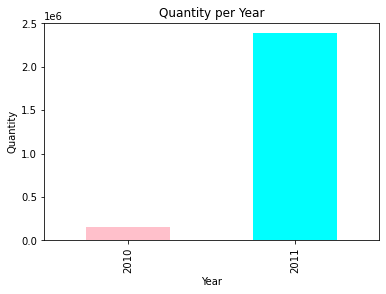

In [113]:
df.groupby(by = ['Year'])['Quantity'].sum().plot.bar(color = ['pink','cyan'])
plt.xlabel("Year")
plt.ylabel("Quantity")
plt.title("Quantity per Year")
plt.show()

We can clearly see that more products were sold in 2011.

<h5> InvoiceDate </h5>



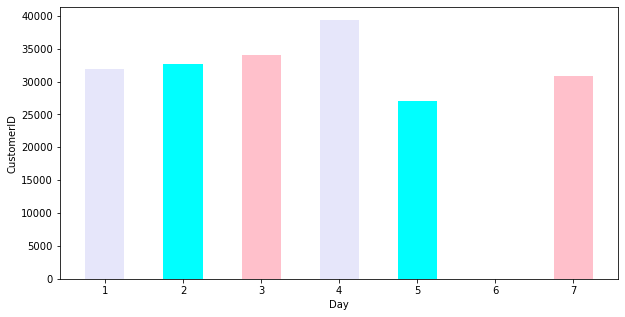

In [115]:
# Now let's see which day had the highest number of sales 

my_dict=(df['Day'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['Day','CustomerID']) 
fig=plt.figure(figsize=(10,5))
plt.bar(count['Day'],count['CustomerID'],color=['lavender', 'pink', 'cyan'],width=0.5)
plt.xlabel("Day")
plt.ylabel("CustomerID")
plt.show()

Since there are zero records for Saturday, we analyse for all other days. Here, we can see that the number of customers on Wednesday is the highest.

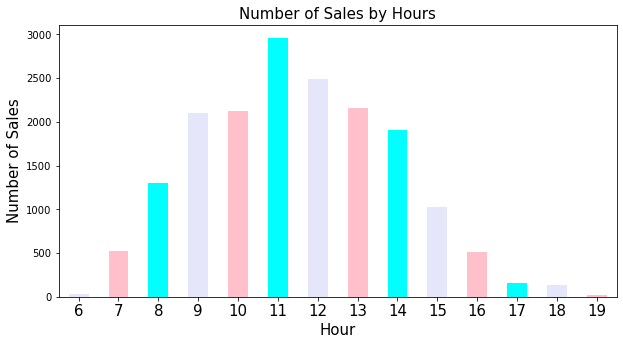

In [106]:
# Now let's see what hours of the day has most number of sales 

ax = df.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind = 'bar',color=['lavender', 'pink', 'cyan'], figsize=(10,5))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Sales',fontsize=15)
ax.set_title('Number of Sales by Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

It can be clearly seen that the most number of sales occur between 11:00 AM - 02:00 PM

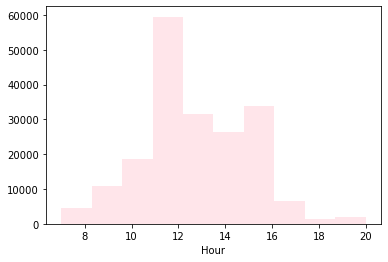

In [105]:
sns.distplot(df['Hour'], kde = False, color ='pink', bins = 10)

<h5> Country </h5>

In [47]:
# Top 5 Countries 
con = df.groupby(by = ['Country'], as_index=False )['TotalAmount'].sum()
con = con.sort_values(by='TotalAmount', ascending=False).head()
con

,Country,TotalAmount
35,35,3496635.634
23,23,139087.610
10,10,128051.380
14,14,114179.000
13,13,106416.340


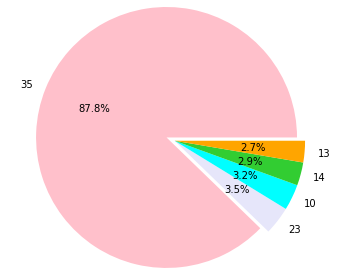

In [48]:
country = con['Country'].tolist()
amount = con['TotalAmount'].tolist()

plt.axis("equal")
plt.pie(amount,labels = country, radius = 1.5, autopct = '%0.1f%%', explode = [0.1,0,0,0,0], colors = ['pink', 'lavender', 'cyan','limegreen','orange'])
plt.show()

We can see that the highest amount of money was spent by customers from country code 35.

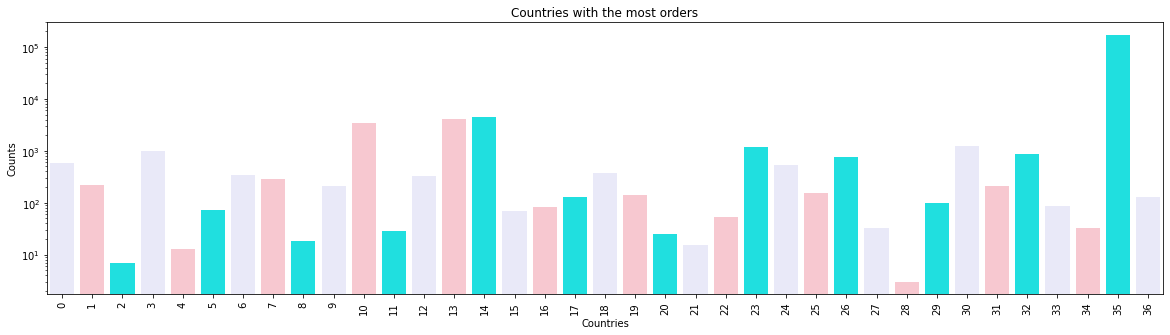

In [49]:
count = df['Country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(count.index, count.values, palette=['lavender', 'pink', 'cyan'] )
plt.xlabel("Countries")
plt.ylabel("Counts")
plt.title("Countries with the most orders")
plt.xticks(rotation=90);
plt.yscale("log")

In [34]:
df['Country'].value_counts(normalize = True).head(1)

35    0.890445
Name: Country, dtype: float64

Almost 90% of the sales are from country 35, it clearly shows that the retailer should focus more on customers from this country. 

In [36]:
# Let us filter out the customer IDs from country 35 

df_35 = df[(df['Country']==35) & (df['CustomerID']!=-1)]
df_35.reset_index(drop=True, inplace = True)


In [39]:
df_35['UnitPrice'].describe().round(2)

count    174245.00
mean          2.92
std           9.06
min           0.00
25%           1.25
50%           1.95
75%           3.75
max        1599.26
Name: UnitPrice, dtype: float64

Around 75% of the products sold have Unit price of 3.75.

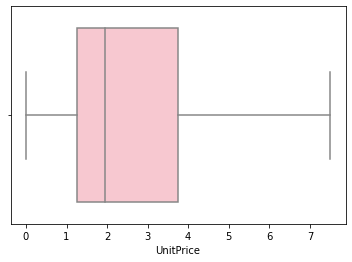

In [42]:
# lets plot a boxplot without statistical outliers

sns.boxplot(df_35['UnitPrice'], showfliers = False, color = 'pink')

<h5> Customers </h5>

In [62]:
# Top 5 customers 
cust = df.groupby(by = ['CustomerID', 'Country'], as_index=False)['TotalAmount'].sum()
cust.sort_values(by='TotalAmount', ascending=False).head()

,CustomerID,Country,TotalAmount
1676,14646.0,23,136418.78
4146,18102.0,35,125960.37
3683,17450.0,35,104518.12
0,12346.0,35,77183.60
1864,14911.0,10,72659.46


The top 3 customers are from countries: 23,35 and 10. Among these, customers from country 23 spent the highest amount of money and most of the customers are from country 35. 

In [66]:
# Based on any determined time period such as Daily, Weekly or Yearly, we can classify them as new or Regular.

# Lets classify the customers based on months.

cust_type=df_35.drop_duplicates(['InvoiceNo','CustomerID'])
cust_type.reset_index(drop=True, inplace = True)
cust_type.loc[:,'Type']=np.nan


for cust in cust_type['CustomerID'].unique():
    cust_type.loc[cust_type[cust_type['CustomerID']==cust].index,'Type']='Regular'
    cust_type.loc[cust_type[cust_type['CustomerID']==cust].index[0],'Type']='New'

cust_type.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Hour,Minute,WeekDay,TotalAmount,Type
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,2011,5,16,54,6,11.25,New
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,2011,5,7,35,11,11.70,New
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,2011,11,13,20,20,23.80,New
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,2011,11,12,7,22,0.83,New
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,2011,5,9,0,6,19.80,New


In [75]:
# Creating a new column for date time (Year-month)

cust_type.loc[:,'YM']=cust_type.InvoiceDate.dt.strftime("%Y-%m")

# Creating a dataframe from dictionary of monthly new and repeat customers

time = {}
for date in cust_type['YM'].unique():
    time[date]=(cust_type[cust_type['YM']==date].drop_duplicates(['CustomerID','Type'])['Type'].value_counts())
monthly_cust=pd.DataFrame(time).transpose()


In [82]:
cust_type.groupby(by = ['Type'])['TotalAmount'].sum()

Type
New        199015.060
Regular    525626.951
Name: TotalAmount, dtype: float64

There is a drastic difference in the amount spent by the regular customers and the new customers

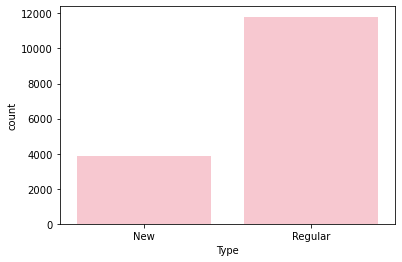

In [81]:
sns.countplot(x ='Type', data = cust_type ,color="pink")

We can see that the count of new customers is remarkably low. The retailer should focus more on the regular customers an improve on marketing strategies to attract more new customers

<h5> Description </h5>

In [92]:
desc = df.groupby(by = ['Description'], as_index=False)['Quantity'].sum()
desc.sort_values(by='Quantity', ascending=False).head()

,Description,Quantity
1907,2002,76097
3624,3805,24982
1687,1771,23386
207,217,16234
2480,2612,16178


Product 2002 was sold the most

In [116]:
df['Description'].value_counts().head()

3716    995
1771    820
2780    786
217     709
2355    678
Name: Description, dtype: int64

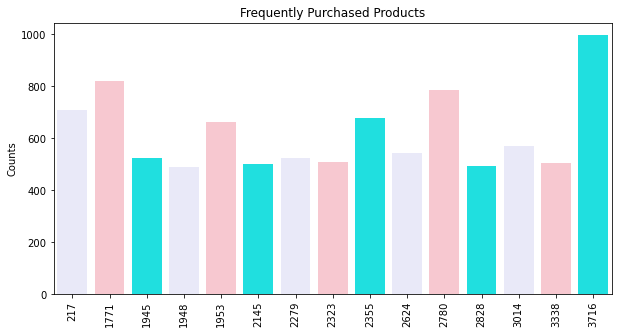

In [121]:
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(10,5))
sns.barplot(item_counts.index, item_counts.values, palette=['lavender', 'pink', 'cyan'] )
plt.ylabel("Counts")
plt.title("Frequently Purchased Products")
plt.xticks(rotation=90)
plt.show()

<h5> Stock Codes </h5>

In [122]:
#Let's check out stoke codes

df['StockCode'].value_counts().head()

3249    998
3235    820
1292    786
3069    709
2599    678
Name: StockCode, dtype: int64

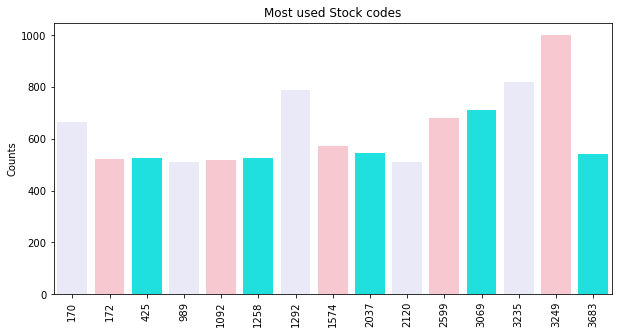

In [125]:
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(10,5))
sns.barplot(stock_counts.index, stock_counts.values, palette=['lavender', 'pink', 'cyan'])
plt.ylabel("Counts")
plt.title("Most used Stock codes");
plt.xticks(rotation=90);

We can see that the Stock Codes are deeply correlated with descriptions

<h5> Outliers </h5>

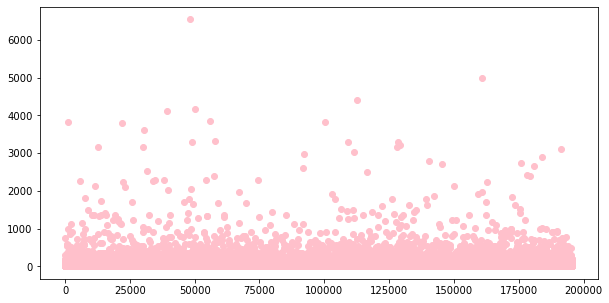

In [180]:
# Let us detect outliers now

plt.figure(figsize=(10,5))
plt.scatter(x=df.index, y=df['TotalAmount'], color = 'pink')
plt.show()

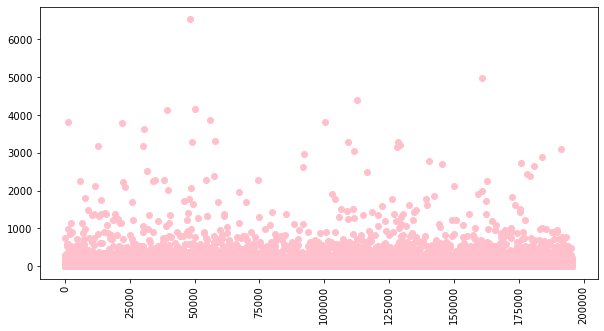

In [179]:
# Now, to remove these outliers 

df = df[df['TotalAmount'] < 25000]
plt.figure(figsize=(10,5))
plt.scatter(x=df.index, y=df['TotalAmount'], color= 'pink' )
plt.xticks(rotation=90)
plt.show()


We can still see some outliers 

In [140]:
df['TotalAmount'].quantile([0.05, 0.95, 0.98, 0.99, 0.999])

0.050      1.25000
0.950     67.50000
0.980    134.40000
0.990    199.68000
0.999    816.07656
Name: TotalAmount, dtype: float64

We can see that if we remove top 2% of our data points we will get rid of absolute outliers and will have more balanced dataset.

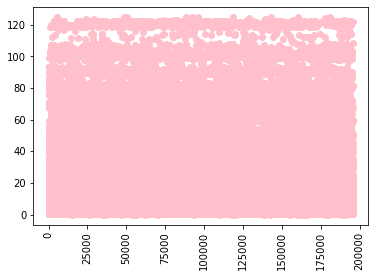

In [181]:
df_quantile = df[df['TotalAmount'] < 125]
plt.scatter(x=df_quantile.index, y=df_quantile['TotalAmount'], color = 'pink')
plt.xticks(rotation=90)
plt.show()

<h5> Quantity </h5>

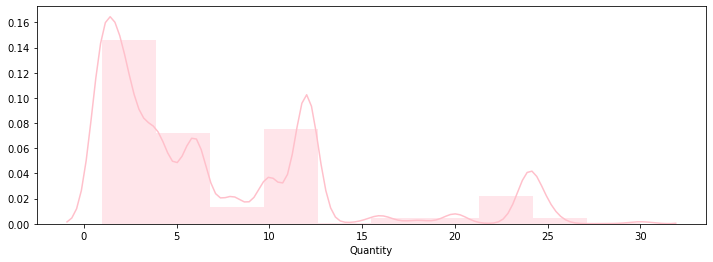

In [142]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 30]['Quantity'], kde=True, bins=10, color='pink')
plt.show()

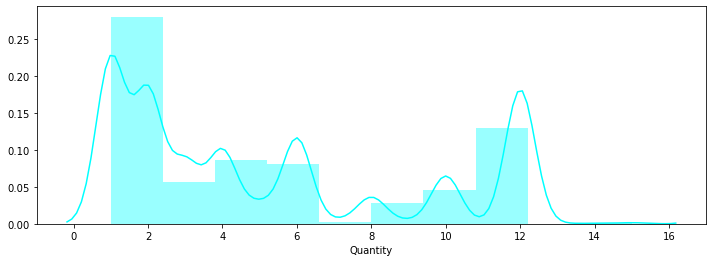

In [143]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 15]['Quantity'], kde=True, bins=10, color='cyan')
plt.show()

From these histograms we can see that people bought normally 1-5 items or 10-12 - there were probably some kind of offers on these

 <h5> Quantity per invoice feature </h5>

A feature that could influence the sales output could be "Quantity per invoice". Let's find the data for this feature.

In [159]:
df_join = df.groupby('InvoiceNo')[['Quantity']].sum()

In [160]:
df_join = df_join.reset_index()
df_join.head()

,InvoiceNo,Quantity
0,0,28
1,1,6
2,2,42
3,3,15
4,5,329


In [161]:
df['InvoiceDate'] = df.index
df = df.merge(df_join, how='left', on='InvoiceNo')
df = df.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df.tail(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount,QuantityRange,PriceRange,DateRange,QuantityInv
195667,5651,1350,3007,2,199984,12.75,16019.0,35,2011,4,4,15,16,21,25.50,"(0, 2]","(4, 20]","(3, 6]",48
195668,13404,2203,1000,1,199985,4.15,14730.0,35,2011,10,3,13,47,5,4.15,"(0, 2]","(4, 20]","(9, 12]",92
195669,15530,2143,3298,3,199986,1.65,14664.0,35,2011,11,7,14,56,6,4.95,"(2, 5]","(1, 2]","(9, 12]",158
195670,11859,1190,3427,1,199987,2.55,17841.0,35,2011,9,5,10,12,9,2.55,"(0, 2]","(2, 3]","(6, 9]",49
195671,3912,1767,1644,2,199988,0.65,13263.0,35,2011,3,1,15,13,14,1.30,"(0, 2]","(0, 1]","(0, 3]",117
195672,17205,1522,2433,5,199989,2.95,16173.0,35,2011,11,4,10,53,24,14.75,"(2, 5]","(2, 3]","(9, 12]",93
195673,14326,1080,3248,1,199990,1.65,16885.0,35,2011,10,3,14,22,19,1.65,"(0, 2]","(1, 2]","(9, 12]",29
195674,1284,1339,3532,1,199991,4.95,15581.0,35,2010,12,7,14,23,19,4.95,"(0, 2]","(4, 20]","(9, 12]",9
195675,4608,912,2275,12,199992,0.55,15353.0,35,2011,3,3,12,15,30,6.60,"(11, 14]","(0, 1]","(0, 3]",101
195676,9846,1544,1021,1,199993,7.95,16033.0,35,2011,7,1,13,45,25,7.95,"(0, 2]","(4, 20]","(6, 9]",99


<h5> Feature Scaling </h5>

<h6> Bucketizing Quantity and UnitPrice features </h6>

Based on the EDA done previously we can group these features into 6 buckets for Quantity and 5 for UnitePrice using pandas .cut() method.

In [162]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df['QuantityRange'] = pd.cut(df['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df['PriceRange'] = pd.cut(df['UnitPrice'], bins=bins_p)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount,QuantityRange,PriceRange,DateRange,QuantityInv
0,6141,1583,144,3,0,3.75,14056.0,35,2011,5,5,16,54,6,11.25,"(2, 5]","(3, 4]","(3, 6]",71
1,6349,1300,3682,6,1,1.95,13098.0,35,2011,5,3,7,35,11,11.70,"(5, 8]","(1, 2]","(3, 6]",553
2,16783,2178,1939,4,2,5.95,15044.0,35,2011,11,7,13,20,20,23.80,"(2, 5]","(4, 20]","(9, 12]",261
3,16971,2115,2983,1,3,0.83,15525.0,35,2011,11,2,12,7,22,0.83,"(0, 2]","(0, 1]","(9, 12]",105
4,6080,1210,2886,12,4,1.65,13952.0,35,2011,5,5,9,0,6,19.80,"(11, 14]","(1, 2]","(3, 6]",235


<h5> Extracting and bucketizing dates </h5>

We have noticed that depends on a season gifts sell differently: pick of sales is in the Q4, then it drastically drops in Q1 of the next year and continues to grow till its new pick in Q4 again. From this observation we can create another feature that could improve our model.

In [163]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df['DateRange'] = pd.cut(df['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount,QuantityRange,PriceRange,DateRange,QuantityInv
195677,10369,1347,383,24,199994,1.25,13435.0,35,2011,8,5,11,49,5,30.00,"(15, 5000]","(1, 2]","(6, 9]",111
195678,9942,2075,3500,6,199996,2.08,12397.0,3,2011,7,3,14,21,27,12.48,"(5, 8]","(2, 3]","(6, 9]",332
195679,15999,856,318,2,199997,3.75,17295.0,35,2011,11,5,10,49,11,7.50,"(0, 2]","(3, 4]","(9, 12]",29
195680,3833,441,2424,1,199998,0.85,15311.0,35,2011,3,5,13,3,11,0.85,"(0, 2]","(0, 1]","(0, 3]",428
195681,13431,930,1128,12,199999,0.42,12723.0,13,2011,10,3,15,52,5,5.04,"(11, 14]","(0, 1]","(9, 12]",105


<h5> Building a Model </h5>

<h5> Splitting data into country 35 and then others </h5>

In [164]:
df35 = df[df['Country'] == 35]
df_abroad = df[df['Country'] != 35]

In [165]:
df35.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,WeekDay,TotalAmount,QuantityRange,PriceRange,DateRange,QuantityInv
0,6141,1583,144,3,0,3.75,14056.0,35,2011,5,5,16,54,6,11.25,"(2, 5]","(3, 4]","(3, 6]",71
1,6349,1300,3682,6,1,1.95,13098.0,35,2011,5,3,7,35,11,11.70,"(5, 8]","(1, 2]","(3, 6]",553
2,16783,2178,1939,4,2,5.95,15044.0,35,2011,11,7,13,20,20,23.80,"(2, 5]","(4, 20]","(9, 12]",261
3,16971,2115,2983,1,3,0.83,15525.0,35,2011,11,2,12,7,22,0.83,"(0, 2]","(0, 1]","(9, 12]",105
4,6080,1210,2886,12,4,1.65,13952.0,35,2011,5,5,9,0,6,19.80,"(11, 14]","(1, 2]","(3, 6]",235


<h5> Extracting features and creating dummy variables </h5>

In [166]:
df_35_model = df35[['TotalAmount', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]
df_35_model.head()

,TotalAmount,QuantityInv,QuantityRange,PriceRange,DateRange
0,11.25,71,"(2, 5]","(3, 4]","(3, 6]"
1,11.70,553,"(5, 8]","(1, 2]","(3, 6]"
2,23.80,261,"(2, 5]","(4, 20]","(9, 12]"
3,0.83,105,"(0, 2]","(0, 1]","(9, 12]"
4,19.80,235,"(11, 14]","(1, 2]","(3, 6]"


In [168]:
df_data = df_35_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,TotalAmount,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,11.25,71,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,11.70,553,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,23.80,261,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.83,105,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,19.80,235,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0


As the majority of our features are in 0-1 range it would make sense to scale "QuantityInv" feature too. In general, scaling features is normally a good idea.

In [169]:
from sklearn.preprocessing import scale
df_data['QuantityInv'] = scale(df_data['QuantityInv'])

<h5> Splitting data into train and test set </h5>

In [171]:
y = df_data['TotalAmount']
X = df_data.drop(columns=['TotalAmount'])

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [175]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
    regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    # Print the tuned parameters and score
    print(" === Start report for regressor {} ===".format(model))
    score_dict[model] = regressor.best_score_
    print("Tuned Parameters: {}".format(regressor.best_params_)) 
    params_dict = regressor.best_params_
    print("Best score is {}".format(regressor.best_score_))

    # Compute metrics
    mae_dict[model] = mean_absolute_error(y_test, y_pred)
    print("MAE for {}".format(model))
    print(mean_absolute_error(y_test, y_pred))
    mse_dict[model] = mean_squared_error(y_test, y_pred)
    print("MSE for {}".format(model))
    print(mean_squared_error(y_test, y_pred))
    r2_dict[model] = r2_score(y_test, y_pred)
    print("R2 score for {}".format(model))
    print(r2_score(y_test, y_pred))
    print(" === End of report for regressor {} === \n".format(model))
  
    # Add best estimator to the dict
    best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': False}
Best score is 0.18832297789857672
MAE for LinearRegression
16.610267483370155
MSE for LinearRegression
4140.037063031651
R2 score for LinearRegression
0.18102146174463885
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.3312791925342
MAE for DecisionTreeRegressor
8.201680223481999
MSE for DecisionTreeRegressor
2652.241020319498
R2 score for DecisionTreeRegressor
0.47533598350649264
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.44718718174676014
MAE for RandomForest
7.982195850053603
MSE for RandomForest
2556.37079038976
R2 score for RandomForest
0.4943009491758017
 === End of report 

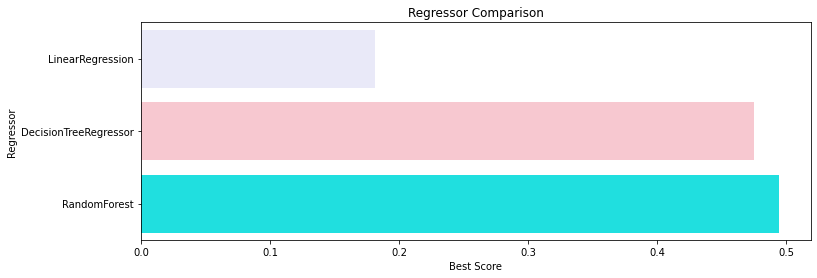

In [177]:
# Creating summary report
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary, palette=['lavender', 'pink', 'cyan'])